<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression
* PCA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn.datasets as skd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

# regression

In [2]:
raw = dict(zip(sns.get_dataset_names(), [sns.load_dataset(a) for a in sns.get_dataset_names()]))
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [3]:
raw2 = skd.load_boston()
raw2.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
x = pd.DataFrame(raw2['data'], columns = raw2['feature_names'])
y = raw2['target']
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [8]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [10]:
pred_rf = fit_rf.predict(x_te)

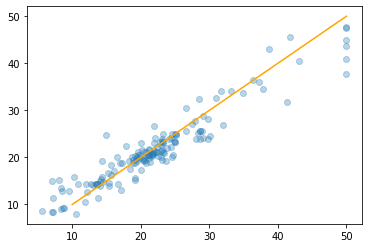

In [13]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([10,50], [10,50], color = 'orange')

In [15]:
d1 = raw['titanic']
d1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
d1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [17]:
x = d1[['sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class']]
y = d1['survived']

In [18]:
x.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
dtype: int64

In [19]:
x = x.assign(fam = x.age + x.sibsp + 1)
x.head()

,sex,age,sibsp,parch,fare,embarked,class,fam
0,male,22.0,1,0,7.2500,S,Third,24.0
1,female,38.0,1,0,71.2833,C,First,40.0
2,female,26.0,0,0,7.9250,S,Third,27.0
3,female,35.0,1,0,53.1000,S,First,37.0
4,male,35.0,0,0,8.0500,S,Third,36.0


In [20]:
x = pd.get_dummies(x.drop(['sibsp', 'parch'], axis = 1), columns = ['sex', 'embarked', 'class'])
x.head()

,age,fare,fam,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,22.0,7.2500,24.0,0,1,0,0,1,0,0,1
1,38.0,71.2833,40.0,1,0,1,0,0,1,0,0
2,26.0,7.9250,27.0,1,0,0,0,1,0,0,1
3,35.0,53.1000,37.0,1,0,0,0,1,1,0,0
4,35.0,8.0500,36.0,0,1,0,0,1,0,0,1


In [28]:
imputer = KNNImputer(n_neighbors = 5)
x_ = imputer.fit_transform(x)
x_

array([[22.    ,  7.25  , 24.    , ...,  0.    ,  0.    ,  1.    ],
       [38.    , 71.2833, 40.    , ...,  1.    ,  0.    ,  0.    ],
       [26.    ,  7.925 , 27.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [20.4   , 23.45  , 22.    , ...,  0.    ,  0.    ,  1.    ],
       [26.    , 30.    , 27.    , ...,  1.    ,  0.    ,  0.    ],
       [32.    ,  7.75  , 33.    , ...,  0.    ,  0.    ,  1.    ]])

In [29]:
x_ = pd.DataFrame(x_, columns = x.columns)
x_.head

<bound method NDFrame.head of       age     fare   fam  sex_female  sex_male  embarked_C  embarked_Q  \
0    22.0   7.2500  24.0         0.0       1.0         0.0         0.0   
1    38.0  71.2833  40.0         1.0       0.0         1.0         0.0   
2    26.0   7.9250  27.0         1.0       0.0         0.0         0.0   
3    35.0  53.1000  37.0         1.0       0.0         0.0         0.0   
4    35.0   8.0500  36.0         0.0       1.0         0.0         0.0   
..    ...      ...   ...         ...       ...         ...         ...   
886  27.0  13.0000  28.0         0.0       1.0         0.0         0.0   
887  19.0  30.0000  20.0         1.0       0.0         0.0         0.0   
888  20.4  23.4500  22.0         1.0       0.0         0.0         0.0   
889  26.0  30.0000  27.0         0.0       1.0         1.0         0.0   
890  32.0   7.7500  33.0         0.0       1.0         0.0         1.0   

     embarked_S  class_First  class_Second  class_Third  
0           1.0        

In [30]:
x_.isnull().sum()

age             0
fare            0
fam             0
sex_female      0
sex_male        0
embarked_C      0
embarked_Q      0
embarked_S      0
class_First     0
class_Second    0
class_Third     0
dtype: int64

In [35]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [36]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)

In [38]:
accuracy_score(y_tr, fit_rf.predict(x_tr)), accuracy_score(y_te, pred_rf)

(0.9839486356340289, 0.8283582089552238)

In [44]:
roc_auc_score(y_tr, fit_rf.predict(x_tr)), roc_auc_score(y_te, pred_rf)

(0.9785407725321889, 0.8192833650683746)

In [40]:
 fpr, tpr, threshold = roc_curve(y_te, proba_rf[:,-1])

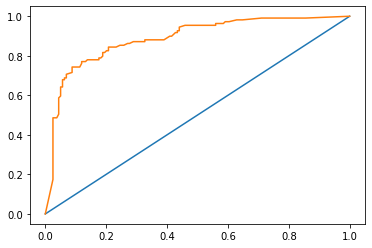

In [41]:
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)

# PCA

In [45]:
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [49]:
a1 = raw['taxis']
a1.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [50]:
a1.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [51]:
a1.shape

(6433, 14)

In [54]:
a2 = a1.dropna()

In [57]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6341 non-null   object 
 1   dropoff          6341 non-null   object 
 2   passengers       6341 non-null   int64  
 3   distance         6341 non-null   float64
 4   fare             6341 non-null   float64
 5   tip              6341 non-null   float64
 6   tolls            6341 non-null   float64
 7   total            6341 non-null   float64
 8   color            6341 non-null   object 
 9   payment          6341 non-null   object 
 10  pickup_zone      6341 non-null   object 
 11  dropoff_zone     6341 non-null   object 
 12  pickup_borough   6341 non-null   object 
 13  dropoff_borough  6341 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 743.1+ KB


In [83]:
val_cnt = [eval(f'a2["{a}"].value_counts()') for a in ['payment','pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']]

In [88]:
print(val_cnt[0])
print(val_cnt[3])

credit card    4546
cash           1795
Name: payment, dtype: int64
Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: pickup_borough, dtype: int64


In [90]:
a1.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [113]:
a2 = a1.drop(['pickup_zone', 'dropoff_zone'], axis = 1)
a2 = a2.assign(pickup = a2.pickup.to_numpy().astype('datetime64[s]'),
               dropoff = a2.dropoff.to_numpy().astype('datetime64[s]'))
a2 = a2.assign(time = (a2.dropoff - a2.pickup).astype(int))
a2 = a2.drop(['pickup', 'dropoff'],axis = 1)
a2 = pd.get_dummies(a2, columns = ['color','payment',	'pickup_borough',	'dropoff_borough'	])
a2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


,passengers,distance,fare,tip,tolls,total,time,color_green,color_yellow,payment_cash,payment_credit card,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1.60,7.0,2.15,0.0,12.95,375000000000,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1,0.79,5.0,0.00,0.0,9.30,425000000000,0,1,1,0,0,0,1,0,0,0,1,0,0
2,1,1.37,7.5,2.36,0.0,14.16,444000000000,0,1,0,1,0,0,1,0,0,0,1,0,0
3,1,7.70,27.0,6.15,0.0,36.95,1552000000000,0,1,0,1,0,0,1,0,0,0,1,0,0
4,3,2.16,9.0,1.10,0.0,13.40,572000000000,0,1,0,1,0,0,1,0,0,0,1,0,0


In [114]:
std = StandardScaler()
a2['time'] = std.fit_transform(a2['time'].values.reshape(-1,1))
a2.head()

,passengers,distance,fare,tip,tolls,total,time,color_green,color_yellow,payment_cash,payment_credit card,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1.60,7.0,2.15,0.0,12.95,-0.695665,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1,0.79,5.0,0.00,0.0,9.30,-0.624091,0,1,1,0,0,0,1,0,0,0,1,0,0
2,1,1.37,7.5,2.36,0.0,14.16,-0.596893,0,1,0,1,0,0,1,0,0,0,1,0,0
3,1,7.70,27.0,6.15,0.0,36.95,0.989183,0,1,0,1,0,0,1,0,0,0,1,0,0
4,3,2.16,9.0,1.10,0.0,13.40,-0.413664,0,1,0,1,0,0,1,0,0,0,1,0,0


In [115]:
a2.columns

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'time',
       'color_green', 'color_yellow', 'payment_cash', 'payment_credit card',
       'pickup_borough_Bronx', 'pickup_borough_Brooklyn',
       'pickup_borough_Manhattan', 'pickup_borough_Queens',
       'dropoff_borough_Bronx', 'dropoff_borough_Brooklyn',
       'dropoff_borough_Manhattan', 'dropoff_borough_Queens',
       'dropoff_borough_Staten Island'],
      dtype='object')

In [116]:
x = a2[['passengers', 'distance', 'fare', 'tip', 'tolls', 'time',
       'color_green', 'color_yellow', 'payment_cash', 'payment_credit card',
       'pickup_borough_Bronx', 'pickup_borough_Brooklyn',
       'pickup_borough_Manhattan', 'pickup_borough_Queens',
       'dropoff_borough_Bronx', 'dropoff_borough_Brooklyn',
       'dropoff_borough_Manhattan', 'dropoff_borough_Queens',
       'dropoff_borough_Staten Island']]
y = a2['total']

In [117]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [118]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [119]:
pred_rf = fit_rf.predict(x_te)

In [120]:
fit_rf.score(x_te, y_te)

0.9910054697725796

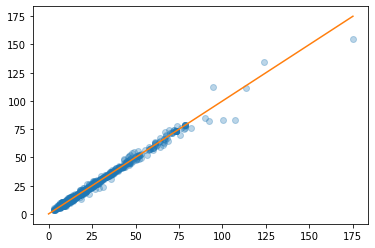

In [124]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([0,175],[0,175])

In [125]:
x = a2[['passengers', 'distance', 'total', 'fare', 'tip', 'tolls', 
       'color_green', 'color_yellow', 'payment_cash', 'payment_credit card',
       'pickup_borough_Bronx', 'pickup_borough_Brooklyn',
       'pickup_borough_Manhattan', 'pickup_borough_Queens',
       'dropoff_borough_Bronx', 'dropoff_borough_Brooklyn',
       'dropoff_borough_Manhattan', 'dropoff_borough_Queens',
       'dropoff_borough_Staten Island']]
y = a2['time']

In [128]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

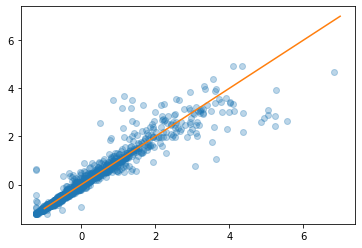

In [130]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([-1,7],[-1,7])